In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
species_sample_one = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_1/STAR_out_Smur2hap1-apices-1/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)
species_sample_two = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_1/STAR_out_Smur2hap1-apices-3/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)


In [3]:
species_sample_one

,Gene,Count
0,Solmur2hap1.Mg000010,0
1,Solmur2hap1.Mg000020,0
2,Solmur2hap1.Mg000030,0
3,Solmur2hap1.Mg000040,0
4,Solmur2hap1.Mg000050,0
...,...,...
36871,Solmur2hap1.ctg00000181g000010,0
36872,Solmur2hap1.ctg00000181g000020,3
36873,Solmur2hap1.ctg00000182g000010,0
36874,Solmur2hap1.ctg00000184g000010,0


In [4]:
species_sample_two

,Gene,Count
0,Solmur2hap1.Mg000010,0
1,Solmur2hap1.Mg000020,0
2,Solmur2hap1.Mg000030,0
3,Solmur2hap1.Mg000040,1
4,Solmur2hap1.Mg000050,0
...,...,...
36871,Solmur2hap1.ctg00000181g000010,0
36872,Solmur2hap1.ctg00000181g000020,1
36873,Solmur2hap1.ctg00000182g000010,0
36874,Solmur2hap1.ctg00000184g000010,0


In [5]:
combined_sample = pd.concat([species_sample_one['Gene'],species_sample_one['Count'],species_sample_two['Count']], axis = 1)
combined_sample

,Gene,Count,Count
0,Solmur2hap1.Mg000010,0,0
1,Solmur2hap1.Mg000020,0,0
2,Solmur2hap1.Mg000030,0,0
3,Solmur2hap1.Mg000040,0,1
4,Solmur2hap1.Mg000050,0,0
...,...,...,...
36871,Solmur2hap1.ctg00000181g000010,0,0
36872,Solmur2hap1.ctg00000181g000020,3,1
36873,Solmur2hap1.ctg00000182g000010,0,0
36874,Solmur2hap1.ctg00000184g000010,0,0


In [6]:
combined_sample.columns = ['FEATURE_ID','Rep 1','Rep 2']
combined_sample = combined_sample.set_index('FEATURE_ID')

In [7]:
combined_sample.head(10)

,Rep 1,Rep 2
FEATURE_ID,,
Solmur2hap1.Mg000010,0,0
Solmur2hap1.Mg000020,0,0
Solmur2hap1.Mg000030,0,0
Solmur2hap1.Mg000040,0,1
Solmur2hap1.Mg000050,0,0
Solmur2hap1.Mg000060,0,0
Solmur2hap1.Mg000070,0,0
Solmur2hap1.Mg000080,0,0
Solmur2hap1.Mg000090,0,0


In [17]:
combined_sample.to_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_1/combined_samples_for_normalizaton.tsv' , sep = '\t')


In [9]:
normalized_combined_sample = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_1/fpkm_normalized_combined_samples.tsv', sep = '\t', index_col= 0)


In [10]:
normalized_combined_sample

,Rep 1,Rep 2
FEATURE_ID,,
Solmur2hap1.Mg000010,0.00000,0.000000
Solmur2hap1.Mg000020,0.00000,0.000000
Solmur2hap1.Mg000030,0.00000,0.000000
Solmur2hap1.Mg000040,0.00000,0.121660
Solmur2hap1.Mg000050,0.00000,0.000000
...,...,...
Solmur2hap1.ctg00000181g000010,0.00000,0.000000
Solmur2hap1.ctg00000181g000020,0.08159,0.025902
Solmur2hap1.ctg00000182g000010,0.00000,0.000000


In [11]:
scipy.stats.spearmanr(normalized_combined_sample['Rep 1'], normalized_combined_sample['Rep 2'])


SpearmanrResult(correlation=0.9609832488455703, pvalue=0.0)

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

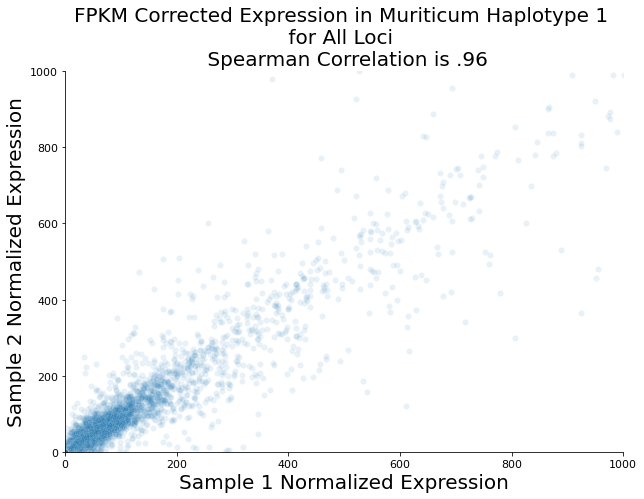

In [20]:
fig, ax = plt.subplots(figsize = (10,7))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(data = normalized_combined_sample, x = 'Rep 1', y = 'Rep 2', alpha = .1, edgecolors = 'none')
plt.ylabel("Sample 2 Normalized Expression", fontsize = 20)
plt.xlabel("Sample 1 Normalized Expression", fontsize = 20)
plt.xlim((0,1000))
plt.ylim((0,1000))
sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.title("FPKM Corrected Expression in Muriticum Haplotype 1 \n for All Loci  \n Spearman Correlation is .96", fontsize = 20)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)